In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
## Load data

df = pd.read_csv("/content/drive/MyDrive/EDA files/data.csv", encoding='latin1')

# **Business Objective**

Analyze the sales performance over time to identify monthly sales trends, understand high-performing and low-performing periods, and uncover factors such as top-selling products, customer behavior, and seasonal patterns to support data-driven business decisions.

# **Data Cleaning**

In [ ]:
##Handling Missing Values

df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
##Removing Duplicate

df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()



np.int64(0)

In [ ]:
##Incorrect Dtype

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
##Handling Negative Values (Keep the value negative in order to analyze the trend in returns.)

df_return = df[df['Quantity'] < 0]
df_return.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [ ]:
df_return = df[df['UnitPrice'] < 0]
df_return.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
##Checking outliers

df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


# **Data Understanding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [ ]:
df.shape

(401604, 8)

In [ ]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df['year'].value_counts()

,count
year,
2011,375250
2010,26354


# **Feature Engineering**

In [ ]:
## Create a new Column for "Total sales"

df["Total Sales"] = df["Quantity"] * df["UnitPrice"]

In [ ]:
## Create a new column for split Year, Month and Day basic

df["year"] = df["InvoiceDate"].dt.year
df["month"] = df["InvoiceDate"].dt.month
df["day"] = df["InvoiceDate"].dt.day


In [ ]:
df['Hour'] = df['InvoiceDate'].dt.hour

In [ ]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

In [ ]:
## to identify the return products

df['IsReturn'] = df['Quantity'].apply(lambda x: 'Return' if x < 0 else 'Sale')

# **Sales trend Analysis**

FileNotFoundError: [Errno 2] No such file or directory: 'images/monthly_sales.png'

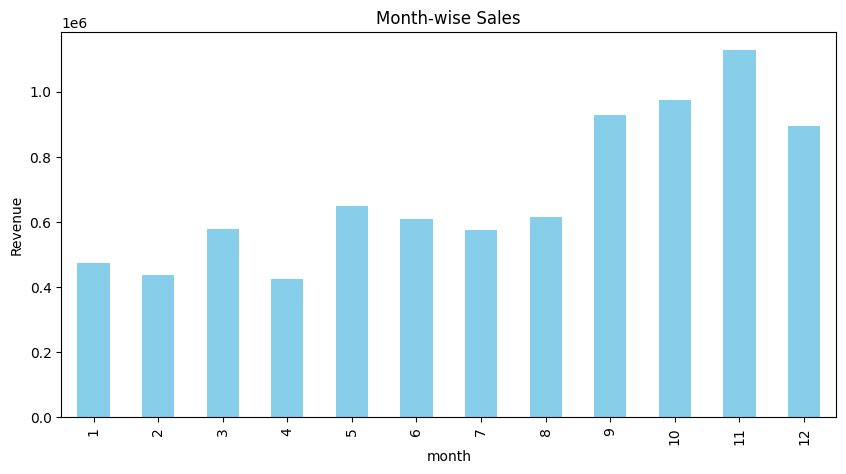

In [ ]:
##Month-wise sales Analysis

monthly_sales = df.groupby('month')['Total Sales'].sum()

monthly_sales.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Month-wise Sales')
plt.ylabel('Revenue')
plt.savefig("images/monthly_sales.png", dpi=300, bbox_inches='tight')
plt.show()

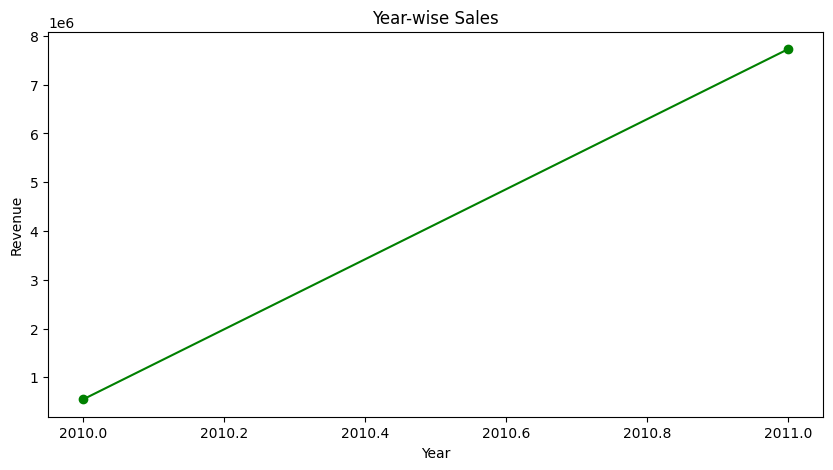

In [ ]:
## Year_wise sales Analysis

yearly_sales = df.groupby('year')['Total Sales'].sum()
yearly_sales.plot(kind='line', marker='o', figsize=(10,5), color='green')
plt.title('Year-wise Sales')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

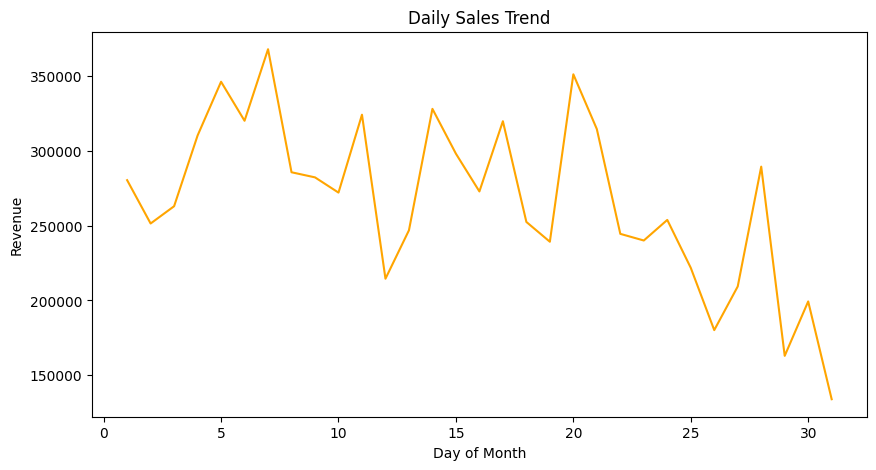

In [ ]:
## daily Sales trend

daily_sales = df.groupby('day')['Total Sales'].sum()
daily_sales.plot(kind='line', figsize=(10,5), color='orange')
plt.title('Daily Sales Trend')
plt.xlabel('Day of Month')
plt.ylabel('Revenue')
plt.show()

In [ ]:
## Hour Sales trend

hourly_sales = df.groupby("Hour")['Total Sales'].sum()
hourly_sales.plot(kind='bar', figsize=(10,5), color='purple')
plt.title('Hourly Sales')
plt.xlabel('Hour of Day')
plt.ylabel('Revenue')
plt.show()

# **Product Sales Analysis**

In [ ]:
## Top Selling Product
top_products = df.groupby("Description")['Total Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(12,6), color='lightgreen')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [ ]:
## Least Selling Product
least_products = df.groupby("Description")['Total Sales'].sum().sort_values().head(10)
least_products.plot(kind='bar', figsize=(12,6), color='salmon')
plt.title('Bottom 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [ ]:
## Quantity base Top Selling product

top_products_quantity = df.groupby("Description")['Quantity'].sum().sort_values(ascending=False).head(10)
top_products_quantity.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# **Customer based Analysis**

In [ ]:
##Top buying customer

top_customers = df.groupby('CustomerID')['Total Sales'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', figsize=(10,5), color='gold')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.show()

In [ ]:
##Frequent shoppin details
customer_orders = df['CustomerID'].value_counts().head(10)
customer_orders.plot(kind='bar', figsize=(10,5), color='lightcoral')
plt.title('Top 10 Customers by Purchase Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.show()

# **County based Analysis**

In [ ]:
country_sales = df.groupby('Country')['Total Sales'].sum().sort_values(ascending=False)
country_sales.plot(kind='bar', figsize=(12,6), color='lightblue')
plt.title('Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [ ]:
##Order count details

country_orders = df['Country'].value_counts()
country_orders.plot(kind='bar', figsize=(12,6), color='orange')
plt.title('Number of Orders by Country')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()